In [ ]:
!pip install utm
!pip install geojson 
!pip install geopandas

# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install folium #지도 시각화 

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from plotnine import *
import folium 
import utm
from shapely.geometry import Point, Polygon

In [ ]:
df_use.columns

Index(['Station_ID', 'STATION_NAME', '거치대 수량', '위도', '경도', 'Loan_count',
       'Return_count', 'Total_count', 'Population', 'Sub_pop', 'Bus_pop',
       'loan_per_pop', 'return_per_pop', 'total_per_pop'],
      dtype='object')

In [ ]:
df_use = pd.read_csv('/content/drive/My Drive/Compas/LSCP/Bike_LSCP_300.csv')
df_base = df_use[['Station_ID', 'STATION_NAME', '거치대 수량', '위도', '경도', 'Loan_count',
       'Return_count', 'Total_count', 'Population', 'Sub_pop', 'Bus_pop']]
df_base

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop
0,101,어울림마을 701동 앞,20,37.654775,126.834585,8366,9207,17573,19019,0,142127
1,103,대림e-편한세상106동,20,37.660442,126.840377,4535,5121,9656,23225,0,37794
2,104,탄현마을8단지,25,37.698523,126.766042,13402,9330,22732,30358,0,53381
3,105,KT 덕양지사 앞,20,37.655244,126.839261,2806,2696,5502,24876,0,136789
4,106,원당역 앞 공영주차장,30,37.653410,126.842530,4444,2357,6801,11356,8607849,257783
...,...,...,...,...,...,...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089,4190,3662,7852,16480,0,29430
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231,473,406,879,21769,0,25007
161,352,◆꿈에그린203동앞,40,37.666425,126.749244,0,0,0,16939,0,25959
162,353,◆꿈에그린106동앞,40,37.666720,126.750784,0,0,0,16907,0,65082


In [ ]:
df_bike = df_base
df_bike['Loan_per_Bike'] = df_bike['Loan_count'] / df_bike['거치대 수량']
df_bike['Return_per_Bike'] = df_bike['Return_count'] / df_bike['거치대 수량']
df_bike['Total_per_Bike'] = df_bike['Total_count'] / df_bike['거치대 수량']
df_bike

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
0,101,어울림마을 701동 앞,20,37.654775,126.834585,8366,9207,17573,19019,0,142127,418.300000,460.350000,878.650
1,103,대림e-편한세상106동,20,37.660442,126.840377,4535,5121,9656,23225,0,37794,226.750000,256.050000,482.800
2,104,탄현마을8단지,25,37.698523,126.766042,13402,9330,22732,30358,0,53381,536.080000,373.200000,909.280
3,105,KT 덕양지사 앞,20,37.655244,126.839261,2806,2696,5502,24876,0,136789,140.300000,134.800000,275.100
4,106,원당역 앞 공영주차장,30,37.653410,126.842530,4444,2357,6801,11356,8607849,257783,148.133333,78.566667,226.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089,4190,3662,7852,16480,0,29430,209.500000,183.100000,392.600
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231,473,406,879,21769,0,25007,11.825000,10.150000,21.975
161,352,◆꿈에그린203동앞,40,37.666425,126.749244,0,0,0,16939,0,25959,0.000000,0.000000,0.000
162,353,◆꿈에그린106동앞,40,37.666720,126.750784,0,0,0,16907,0,65082,0.000000,0.000000,0.000


In [ ]:
df_bike = df_bike.astype({'Station_ID': np.object})
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station_ID       164 non-null    object 
 1   STATION_NAME     164 non-null    object 
 2   거치대 수량           164 non-null    int64  
 3   위도               164 non-null    float64
 4   경도               164 non-null    float64
 5   Loan_count       164 non-null    int64  
 6   Return_count     164 non-null    int64  
 7   Total_count      164 non-null    int64  
 8   Population       164 non-null    int64  
 9   Sub_pop          164 non-null    int64  
 10  Bus_pop          164 non-null    int64  
 11  Loan_per_Bike    164 non-null    float64
 12  Return_per_Bike  164 non-null    float64
 13  Total_per_Bike   164 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 18.1+ KB


## 대여기준

In [ ]:
df_bike['Loan_per_Bike'].describe()

count     164.000000
mean      788.916960
std       722.103545
min         0.000000
25%       268.627500
50%       555.779167
75%      1099.008333
max      3477.450000
Name: Loan_per_Bike, dtype: float64

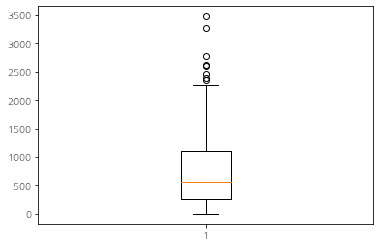

In [ ]:
plt.boxplot(df_bike['Loan_per_Bike'])
plt.show()

In [ ]:
# 세로버전 보기 
# (ggplot(df_bike)
# + aes(x = 'Station_ID', y = 'Loan_per_Bike', fill = 'Loan_per_Bike')
# + geom_bar(stat = 'identity')+coord_flip() 
# + geom_point()
# + labs(x='자전거 스테이션', y='자전거 한 대 당 반납', title = '스테이션 별 자전거 당 반납')
# + theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30)) 
# )

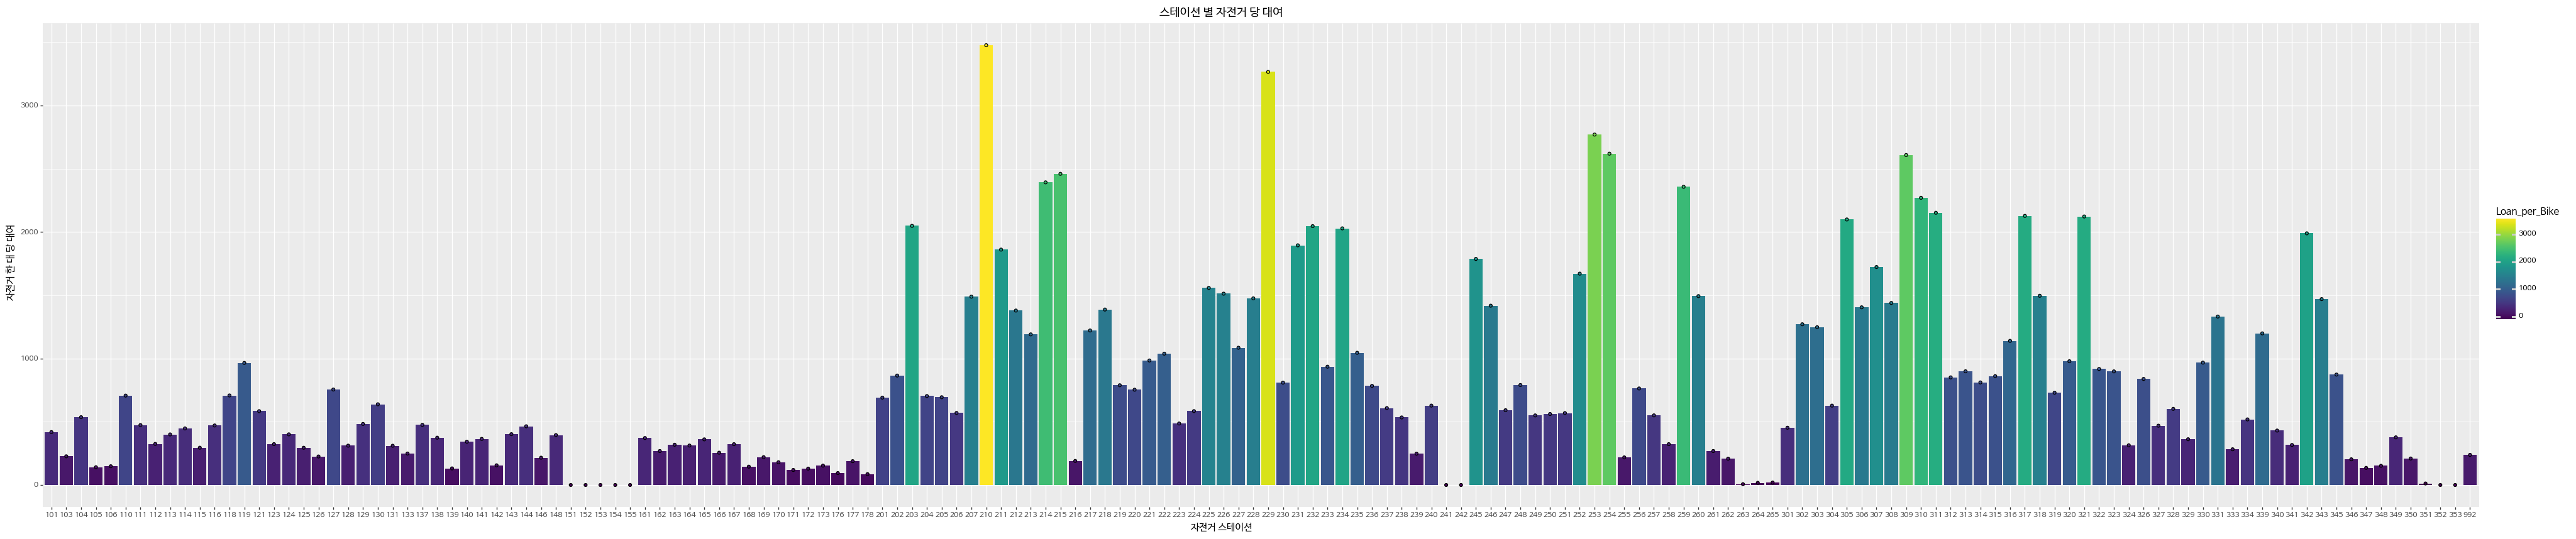

<ggplot: (8738538076038)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Loan_per_Bike', fill = 'Loan_per_Bike')
+ geom_bar(stat = 'identity') 
+ geom_point()
+ labs(x='자전거 스테이션', y='자전거 한 대 당 대여', title = '스테이션 별 자전거 당 대여')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10)) 
)

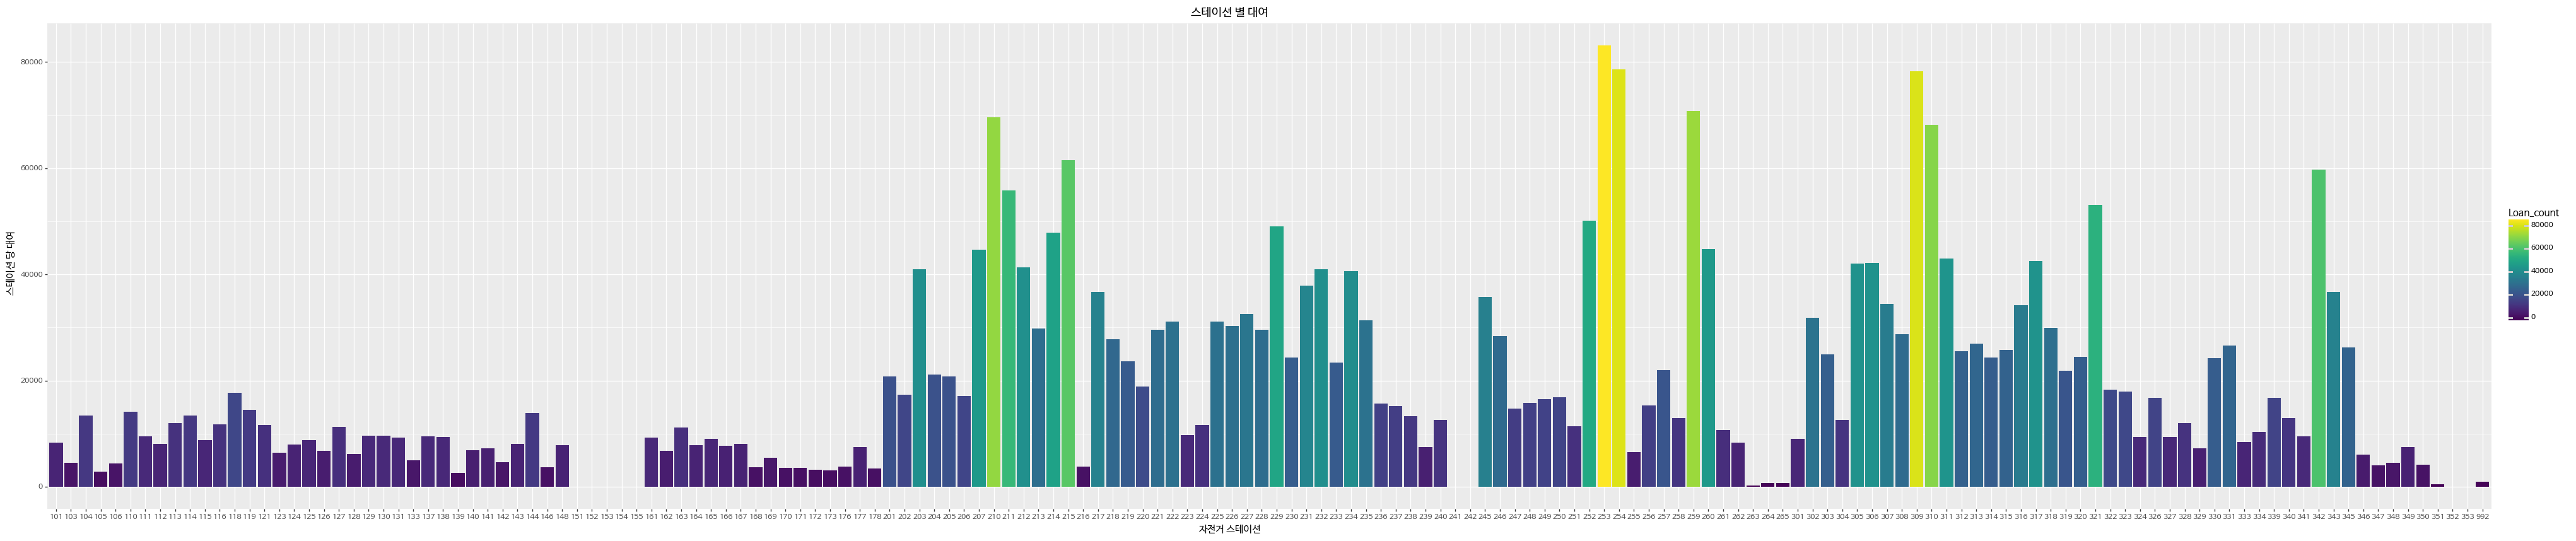

<ggplot: (8738555444130)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Loan_count', fill = 'Loan_count')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='자전거 스테이션', y='스테이션 당 대여', title = '스테이션 별 대여')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10))
        
)

In [ ]:
q1 = df_bike['Loan_per_Bike'].quantile(0.25)
q2 = df_bike['Loan_per_Bike'].quantile(0.5)
q3 = df_bike['Loan_per_Bike'].quantile(0.75)

Q1_Loan = df_bike[df_bike['Loan_per_Bike']<=q1]

rule1 = q1 <= df_bike['Loan_per_Bike']
rule2 =df_bike['Loan_per_Bike']<= q2
Q2_Loan = df_bike[rule1&rule2]

rule3 = q2 <= df_bike['Loan_per_Bike']
rule4 =df_bike['Loan_per_Bike']<= q3
Q3_Loan = df_bike[rule3&rule4]

rule5 = q3<= df_bike['Loan_per_Bike']
Q4_Loan = df_bike[rule5]

In [ ]:
Q4_Loan.sort_values('Loan_per_Bike', ascending=False)

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
63,210,★남정씨티프라자 옆,20,37.663673,126.767099,69549,72191,141740,20468,0,190052,3477.450000,3609.550000,7087.000000
82,229,★풍산역,15,37.672328,126.785754,48999,50222,99221,13807,3577046,36248,3266.600000,3348.133333,6614.733333
104,253,★호수공원 (강선17단지 삼거리),30,37.663241,126.762162,83134,83718,166852,16328,0,17732,2771.133333,2790.600000,5561.733333
105,254,★호수공원 제3주차장 (MBC맞은편),30,37.655647,126.768352,78594,81279,159873,6114,0,1673,2619.800000,2709.300000,5329.100000
125,309,★주엽역 6번출구 앞,30,37.671278,126.761898,78272,75719,153991,30145,7234466,274957,2609.066667,2523.966667,5133.033333
68,215,마두역 7번 출구,25,37.652254,126.778847,61514,51688,113202,21992,6222179,311690,2460.560000,2067.520000,4528.080000
67,214,★마두역 교보생명 옆,20,37.652090,126.777358,47859,44060,91919,22819,6222179,311690,2392.950000,2203.000000,4595.950000
110,259,★웨스턴돔 입구,30,37.656722,126.771620,70746,70482,141228,8000,0,309937,2358.200000,2349.400000,4707.600000
126,310,★주엽역 2번 출구,30,37.669687,126.761237,68133,62163,130296,28557,7234466,273721,2271.100000,2072.100000,4343.200000
127,311,★궁골공원,20,37.670203,126.768394,43050,38253,81303,28676,0,26292,2152.500000,1912.650000,4065.150000


In [ ]:
lat, longi = 37.66714305514331, 126.82008045013437
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for index, row in Q1_Loan.iterrows():
  title = row['Station_ID']
  color = 'red'
  if row['Return_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 3, color = color , fill = True ).add_to(m)
  # folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Return_count'], color = color ).add_to(m)

for index, row in Q2_Loan.iterrows():
  title = row['Station_ID']
  color = 'green'
  if row['Return_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 3, color = color ).add_to(m)

for index, row in Q3_Loan.iterrows():
  title = row['Station_ID']
  color = 'blue'
  if row['Return_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 3, color = color ).add_to(m)

for index, row in Q4_Loan.iterrows():
  title = row['Station_ID']
  color = 'purple'
  if row['Return_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 3, color = color ).add_to(m)
  # folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Return_count'], color = color ).add_to(m)

m

## 반납기준

In [ ]:
df_bike['Return_per_Bike'].describe()

count     164.000000
mean      688.535809
std       690.523914
min         0.000000
25%       231.658333
50%       440.975000
75%       955.020000
max      3609.550000
Name: Return_per_Bike, dtype: float64

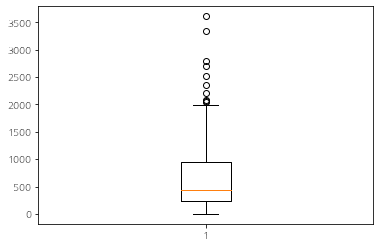

In [ ]:
plt.boxplot(df_bike['Return_per_Bike'])
plt.show()

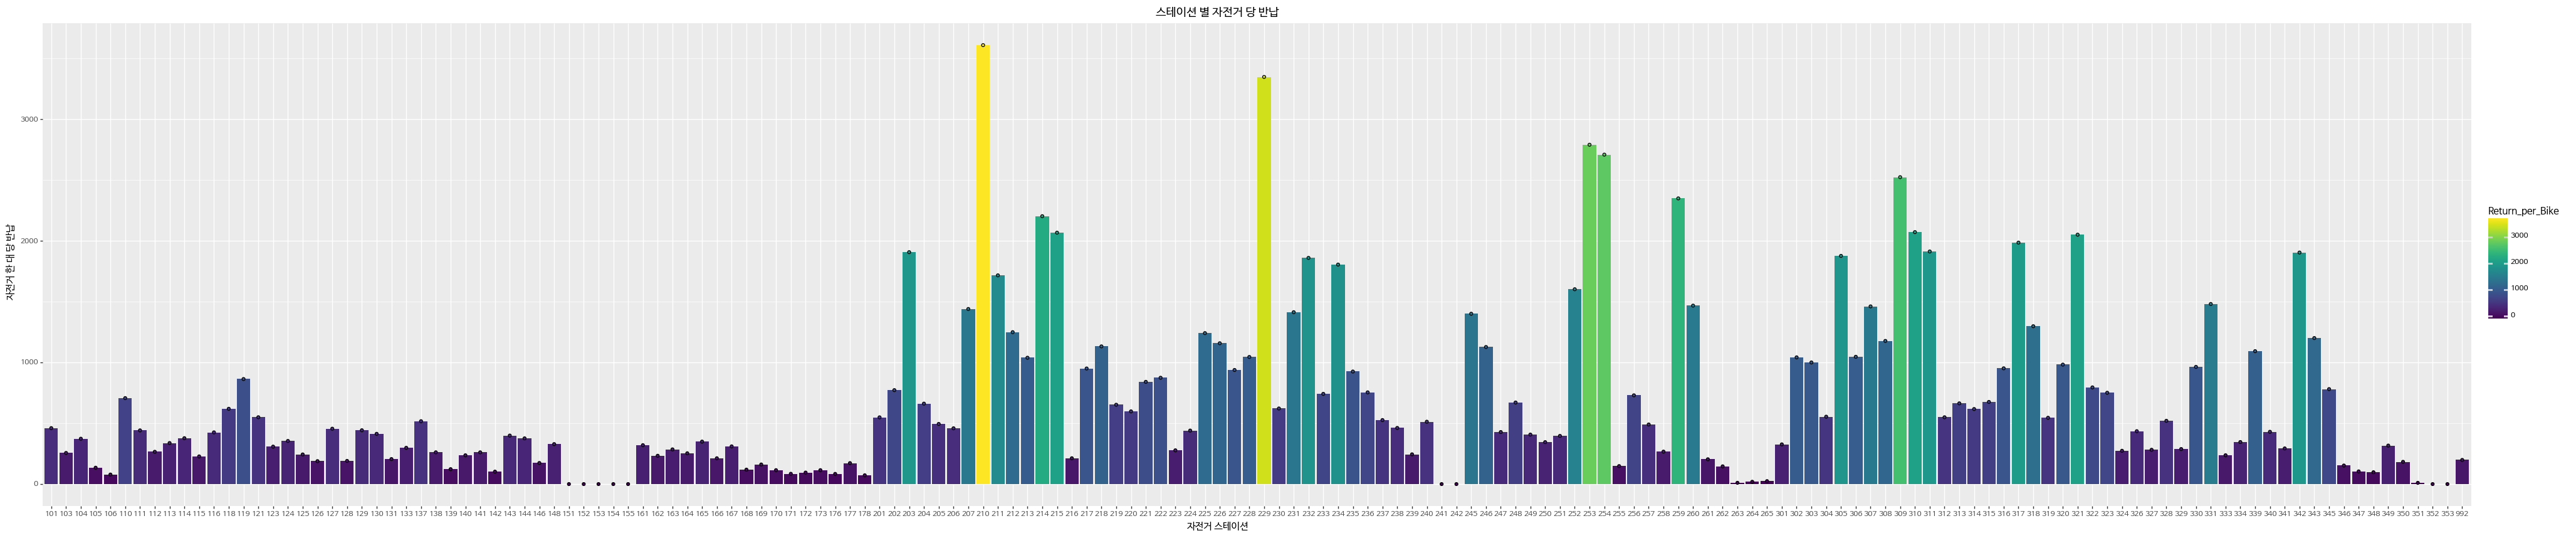

<ggplot: (-9223363298320210060)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Return_per_Bike', fill = 'Return_per_Bike')
+ geom_bar(stat = 'identity') 
+ geom_point()
+ labs(x='자전거 스테이션', y='자전거 한 대 당 반납', title = '스테이션 별 자전거 당 반납')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10)) 
)

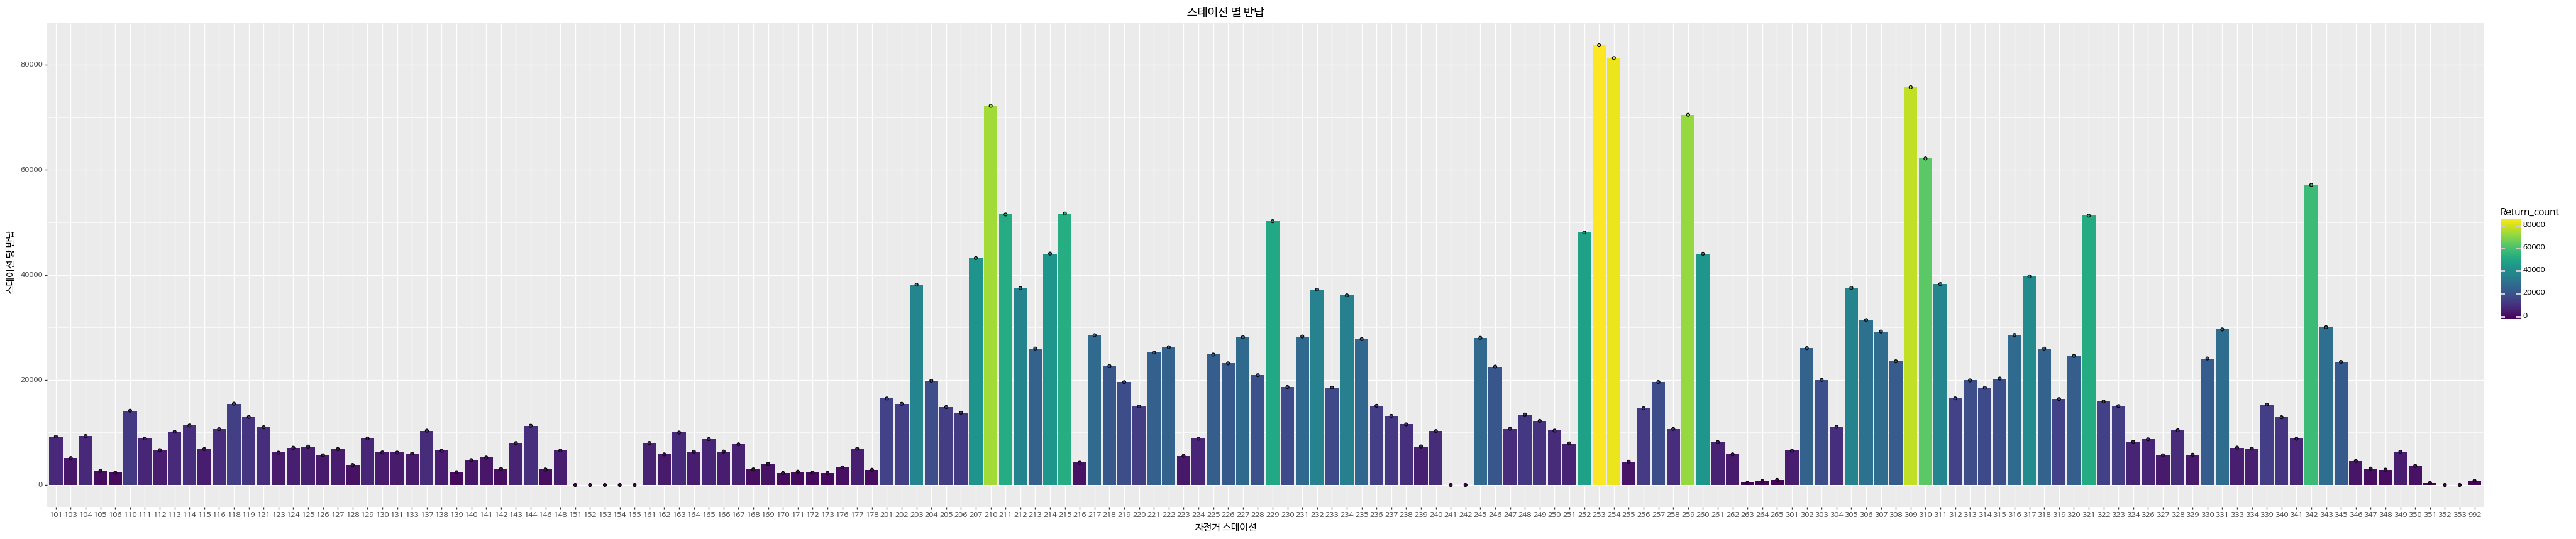

<ggplot: (-9223363298319894633)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Return_count', fill = 'Return_count')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='자전거 스테이션', y='스테이션 당 반납', title = '스테이션 별 반납')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10))
        
)

In [ ]:
q1 = df_bike['Return_per_Bike'].quantile(0.25)
q2 = df_bike['Return_per_Bike'].quantile(0.5)
q3 = df_bike['Return_per_Bike'].quantile(0.75)

Q1_Return = df_bike[df_bike['Return_per_Bike']<=q1]

rule1 = q1 <= df_bike['Return_per_Bike']
rule2 =df_bike['Return_per_Bike']<= q2
Q2_Return = df_bike[rule1&rule2]

rule3 = q2 <= df_bike['Return_per_Bike']
rule4 =df_bike['Return_per_Bike']<= q3
Q3_Return = df_bike[rule3&rule4]

rule5 = q3<= df_bike['Return_per_Bike']
Q4_Return = df_bike[rule5]

In [ ]:
Q4_Return.sort_values('Return_per_Bike', ascending=False)

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
63,210,★남정씨티프라자 옆,20,37.663673,126.767099,69549,72191,141740,20468,0,190052,3477.450000,3609.550000,7087.000000
82,229,★풍산역,15,37.672328,126.785754,48999,50222,99221,13807,3577046,36248,3266.600000,3348.133333,6614.733333
104,253,★호수공원 (강선17단지 삼거리),30,37.663241,126.762162,83134,83718,166852,16328,0,17732,2771.133333,2790.600000,5561.733333
105,254,★호수공원 제3주차장 (MBC맞은편),30,37.655647,126.768352,78594,81279,159873,6114,0,1673,2619.800000,2709.300000,5329.100000
125,309,★주엽역 6번출구 앞,30,37.671278,126.761898,78272,75719,153991,30145,7234466,274957,2609.066667,2523.966667,5133.033333
110,259,★웨스턴돔 입구,30,37.656722,126.771620,70746,70482,141228,8000,0,309937,2358.200000,2349.400000,4707.600000
67,214,★마두역 교보생명 옆,20,37.652090,126.777358,47859,44060,91919,22819,6222179,311690,2392.950000,2203.000000,4595.950000
126,310,★주엽역 2번 출구,30,37.669687,126.761237,68133,62163,130296,28557,7234466,273721,2271.100000,2072.100000,4343.200000
68,215,마두역 7번 출구,25,37.652254,126.778847,61514,51688,113202,21992,6222179,311690,2460.560000,2067.520000,4528.080000
137,321,★일산역 신도시 방면,25,37.681812,126.769340,53080,51277,104357,28661,6808074,61716,2123.200000,2051.080000,4174.280000


## 토탈

In [ ]:
df_bike['Total_per_Bike'].describe()

count     164.000000
mean     1477.452769
std      1408.764810
min         0.000000
25%       501.740000
50%       994.185000
75%      2040.941667
max      7087.000000
Name: Total_per_Bike, dtype: float64

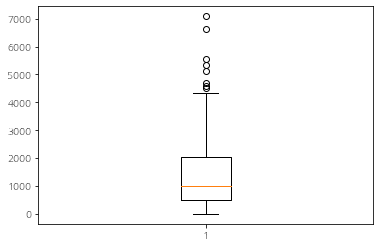

In [ ]:
plt.boxplot(df_bike['Total_per_Bike'])
plt.show()

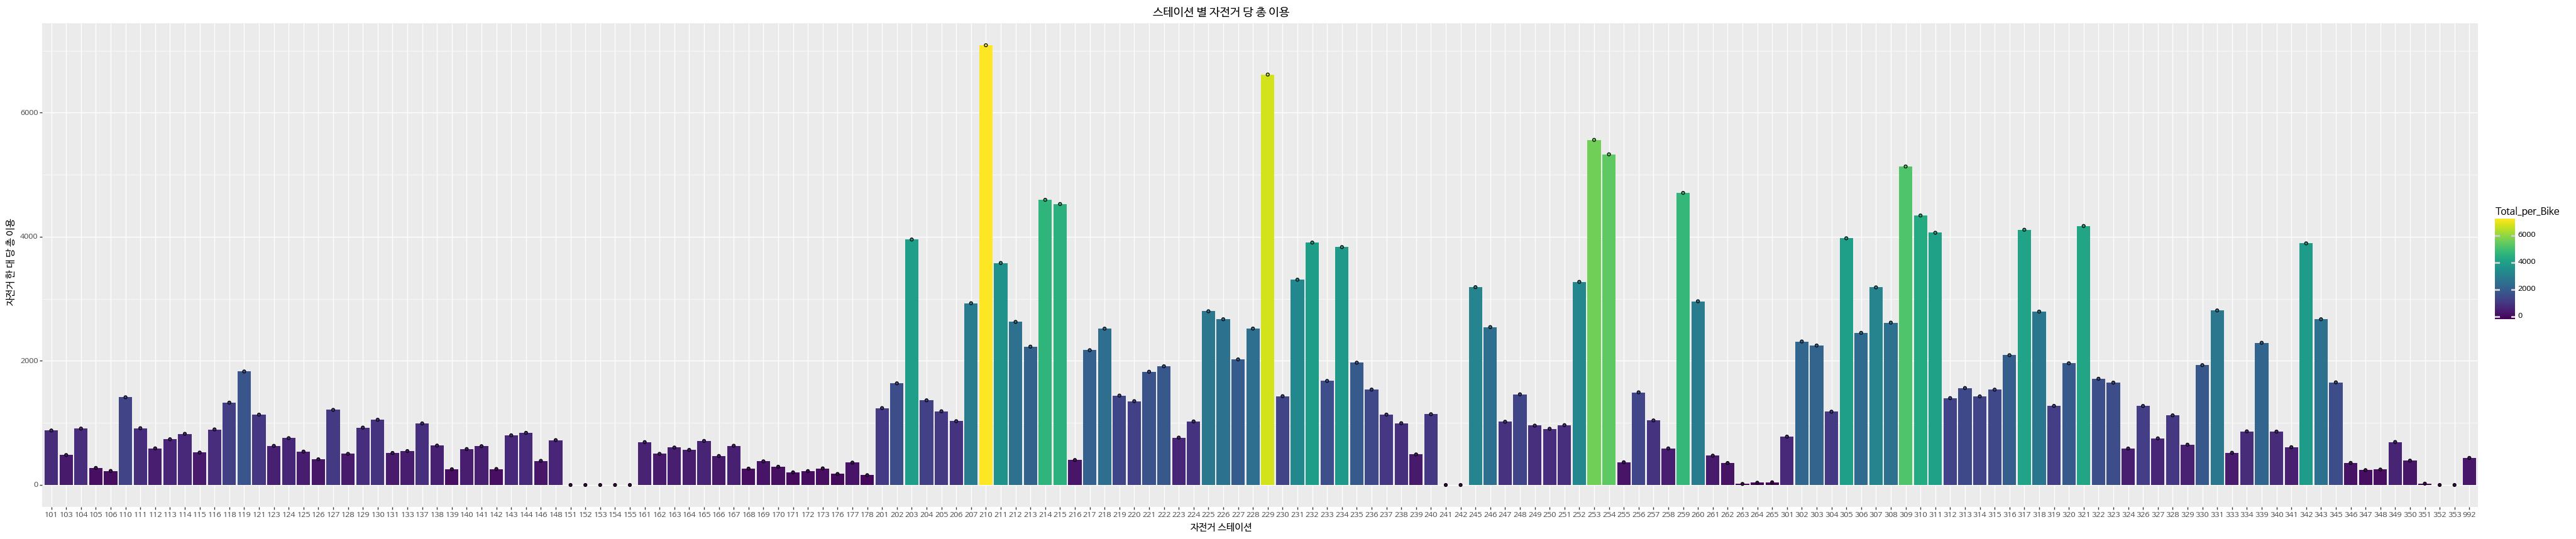

<ggplot: (8738537956381)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Total_per_Bike', fill = 'Total_per_Bike')
+ geom_bar(stat = 'identity') 
+ geom_point()
+ labs(x='자전거 스테이션', y='자전거 한 대 당 총 이용', title = '스테이션 별 자전거 당 총 이용')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10)) 
)

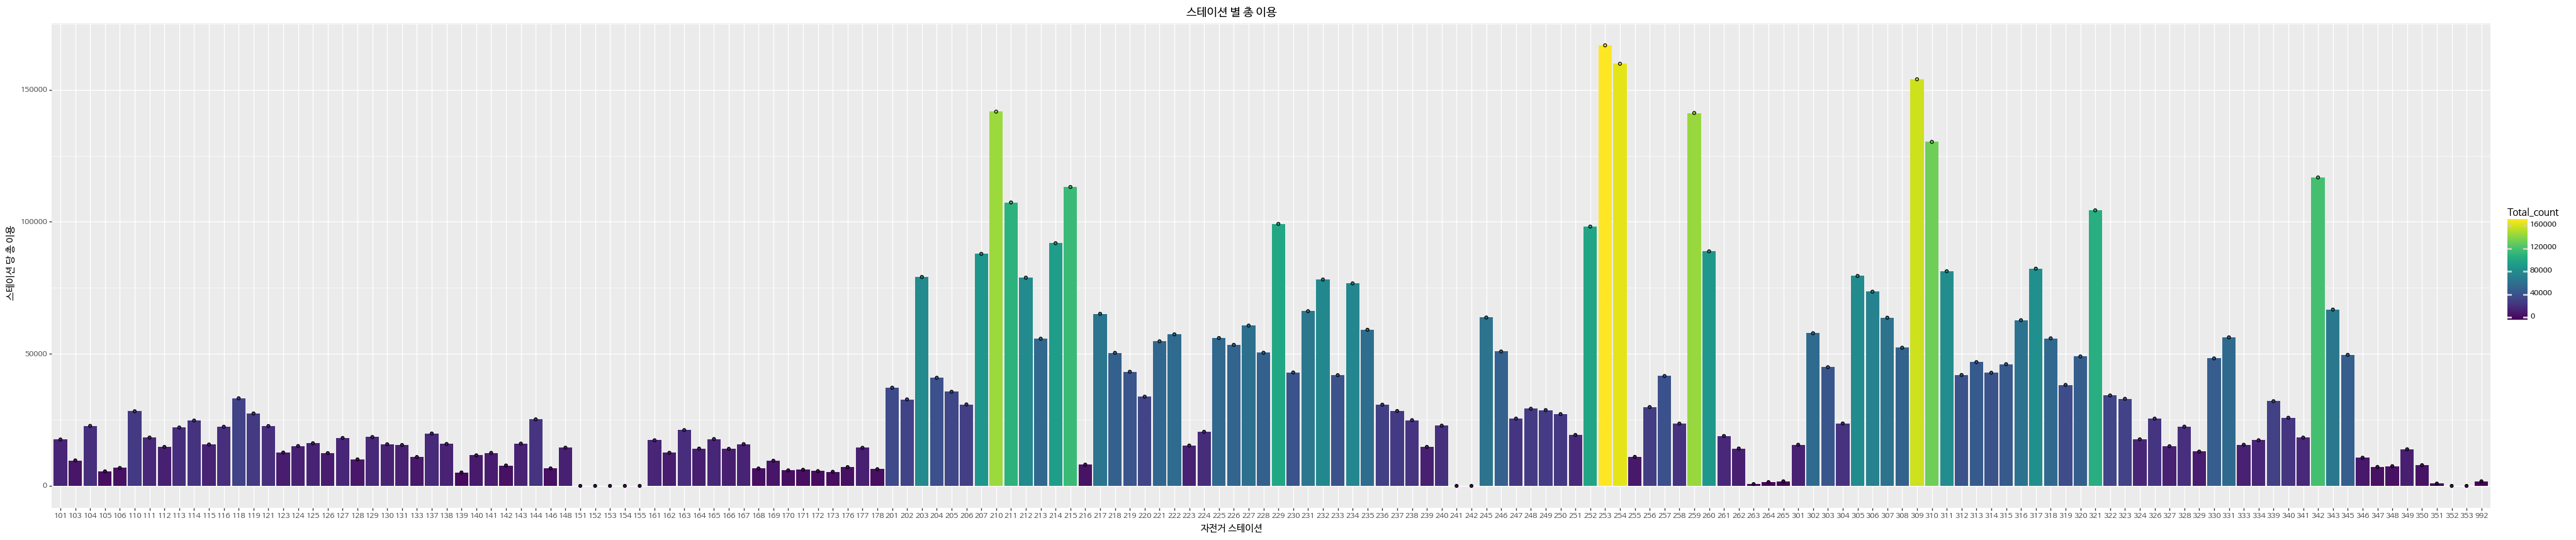

<ggplot: (8738536163213)>

In [ ]:
(ggplot(df_bike)
+ aes(x = 'Station_ID', y = 'Total_count', fill = 'Total_count')
+ geom_bar(stat = 'identity')
+ geom_point()
+ labs(x='자전거 스테이션', y='스테이션 당 총 이용', title = '스테이션 별 총 이용')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (50,10))
        
)

In [ ]:
q1 = df_bike['Total_per_Bike'].quantile(0.25)
q2 = df_bike['Total_per_Bike'].quantile(0.5)
q3 = df_bike['Total_per_Bike'].quantile(0.75)

Q1_Total = df_bike[df_bike['Total_per_Bike']<=q1]

rule1 = q1 <= df_bike['Total_per_Bike']
rule2 =df_bike['Total_per_Bike']<= q2
Q2_Total = df_bike[rule1&rule2]

rule3 = q2 <= df_bike['Total_per_Bike']
rule4 =df_bike['Total_per_Bike']<= q3
Q3_Total = df_bike[rule3&rule4]

rule5 = q3<= df_bike['Total_per_Bike']
Q4_Total = df_bike[rule5]

In [ ]:
Q4_Total.sort_values('Return_per_Bike', ascending=False)

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
63,210,★남정씨티프라자 옆,20,37.663673,126.767099,69549,72191,141740,20468,0,190052,3477.450000,3609.550000,7087.000000
82,229,★풍산역,15,37.672328,126.785754,48999,50222,99221,13807,3577046,36248,3266.600000,3348.133333,6614.733333
104,253,★호수공원 (강선17단지 삼거리),30,37.663241,126.762162,83134,83718,166852,16328,0,17732,2771.133333,2790.600000,5561.733333
105,254,★호수공원 제3주차장 (MBC맞은편),30,37.655647,126.768352,78594,81279,159873,6114,0,1673,2619.800000,2709.300000,5329.100000
125,309,★주엽역 6번출구 앞,30,37.671278,126.761898,78272,75719,153991,30145,7234466,274957,2609.066667,2523.966667,5133.033333
110,259,★웨스턴돔 입구,30,37.656722,126.771620,70746,70482,141228,8000,0,309937,2358.200000,2349.400000,4707.600000
67,214,★마두역 교보생명 옆,20,37.652090,126.777358,47859,44060,91919,22819,6222179,311690,2392.950000,2203.000000,4595.950000
126,310,★주엽역 2번 출구,30,37.669687,126.761237,68133,62163,130296,28557,7234466,273721,2271.100000,2072.100000,4343.200000
68,215,마두역 7번 출구,25,37.652254,126.778847,61514,51688,113202,21992,6222179,311690,2460.560000,2067.520000,4528.080000
137,321,★일산역 신도시 방면,25,37.681812,126.769340,53080,51277,104357,28661,6808074,61716,2123.200000,2051.080000,4174.280000


## 대여 VS 반납

In [ ]:
# 대여비율만 큼 
Return_only = [re for re in Q4_Return['Station_ID'] if re not in list(Q4_Loan['Station_ID'])]
Return_only

[320, 330]

In [ ]:
# df_return_only 
df_return_only  = df_bike[df_bike['Station_ID'].isin(Return_only)]
df_return_only 

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
136,320,★산들마을 사거리 604동 앞,25,37.683161,126.777589,24467,24564,49031,24961,0,145647,978.68,982.56,1961.24
145,330,동문1차 101동 맞은편,25,37.689875,126.765375,24195,24092,48287,37664,0,41498,967.80,963.68,1931.48


In [ ]:
# 반납비율만 큼 
Loan_only = [re for re in Q4_Loan['Station_ID'] if re not in list(Q4_Return['Station_ID'])]
Loan_only

[217, 316]

In [ ]:
df_loan_only  = df_bike[df_bike['Station_ID'].isin(Loan_only)]
df_loan_only 

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,Loan_per_Bike,Return_per_Bike,Total_per_Bike
70,217,강촌공원 육교 앞,30,37.654141,126.783673,36657,28519,65176,25969,0,882,1221.900000,950.633333,2172.533333
132,316,후곡성당 앞,30,37.679809,126.763621,34192,28564,62756,31295,0,70264,1139.733333,952.133333,2091.866667


In [ ]:
lat, longi = 37.66714305514331, 126.82008045013437
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for index, row in df_loan_only.iterrows():
  title = row['Station_ID']
  color = 'red'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 7, color = color).add_to(m)
  folium.Marker([row['위도'], row['경도']]).add_to(m)
  # folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Return_count'], color = color ).add_to(m)

for index, row in df_return_only.iterrows():
  title = row['Station_ID']
  color = 'blue'
  if row['Return_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 7, color = color ).add_to(m)
  folium.Marker([row['위도'], row['경도']]).add_to(m)

for index, row in df_bike.iterrows():
  title = row['Station_ID']
  color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 3, color = color ).add_to(m)

m